# Assignment 5: Analysis and morphology

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
from PIL import Image
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from scipy.ndimage import binary_fill_holes

### 1. Analysis
#### 1.1. Before the analysis step, it is sometimes necessary to remove some objects where numerical values could be wrong. For example, skimage.segmentation.clear_border permits to remove the disrupting objects that are in the border of the image. Using ‘chro’, how many objects are concerned?  

In [ ]:
image_chro = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 5 - IP\\IP5_v2\\IP5_v2\\chro.bmp").convert('L')

#To array
image_array_chro = np.array(image_chro)

#Function for Otsu thresholding
def otsu_method(img):
    otsu_threshold = threshold_otsu(img)
    #Binarization
    binary_image = (img > otsu_threshold).astype(np.uint8)
    return binary_image, otsu_threshold

#Binarization
binary_image_chro, otsu_threshold_chro = otsu_method(image_array_chro)

#Labeling
labeled_image_chro, num_objects_before = label(binary_image_chro, return_num=True)

#Removing the objects on the label
cleared_image_chro = clear_border(binary_image_chro)
cleared_image_chro, num_objects_after = label(cleared_image_chro, return_num=True)

#Counting the number of removed objects
objects_removed_chro = num_objects_before - num_objects_after

print(f"Number of objects in the original image: {num_objects_before}")
print(f"Number of objects after labeling and cleaning: {num_objects_after}")
print(f"Number of removed objects: {objects_removed_chro}")

Number of objects in the original image: 10
Number of objects after labeling: 6
Number of removed objects: 4


(-0.5, 255.5, 255.5, -0.5)

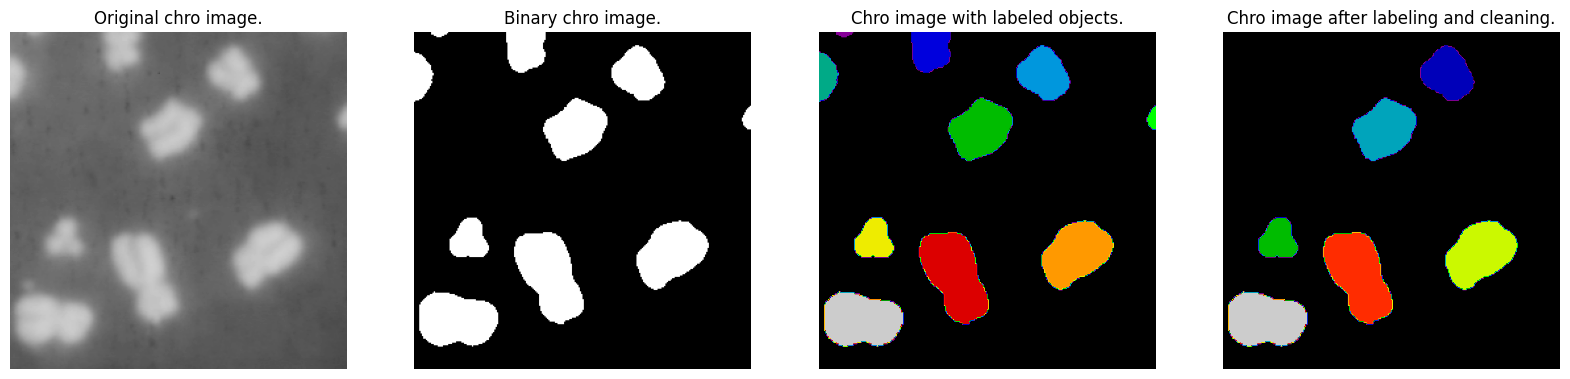

In [11]:
#Plot results
fig, ax = plt.subplots(1, 4, figsize=(20, 15))
ax[0].imshow(image_chro, cmap='gray', norm=NoNorm())
ax[0].set_title("Original chro image.")
ax[0].axis('off')

ax[1].imshow(binary_image_chro, cmap='gray')
ax[1].set_title("Binary chro image.")
ax[1].axis('off')

ax[2].imshow(labeled_image_chro, cmap='nipy_spectral')
ax[2].set_title("Chro image with labeled objects.")
ax[2].axis('off')

ax[3].imshow(cleared_image_chro, cmap='nipy_spectral')
ax[3].set_title("Chro image after labeling and cleaning.")
ax[3].axis('off')

#### 1.2. Using ‘coins’, the aim is to count the number of coins for each class with these specifications:  
#### - Class 1: surface between 1500 and 2000 pixels,  
#### - Class 2: surface between 2300 and 2800 pixels,  
#### No hole inside the objects.

(-0.5, 299.5, 245.5, -0.5)

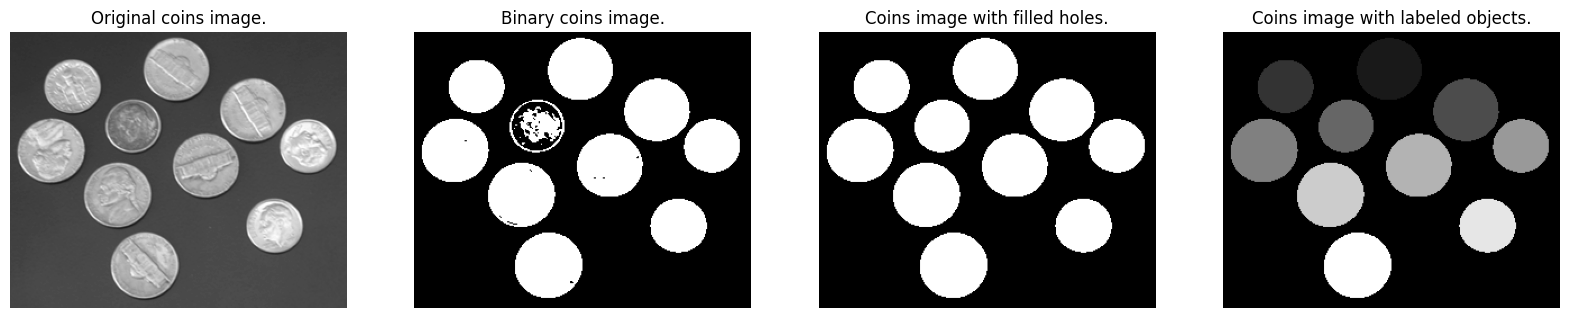

In [40]:
image_coins = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 5 - IP\\IP5_v2\\IP5_v2\\coins.bmp").convert('L')

#To array
image_array_coins = np.array(image_coins)

#Binarization
binary_image_coins, otsu_threshold_coins = otsu_method(image_array_coins)

#Removing the internal holes
filled_image_coins = binary_fill_holes(binary_image_coins)

#Labeling
L = label(filled_image_coins)

#Plot results
fig, ax = plt.subplots(1, 4, figsize=(20, 15))
ax[0].imshow(image_coins, cmap='gray', norm=NoNorm())
ax[0].set_title("Original coins image.")
ax[0].axis('off')

ax[1].imshow(binary_image_coins, cmap='gray')
ax[1].set_title("Binary coins image.")
ax[1].axis('off')

ax[2].imshow(filled_image_coins, cmap='gray')
ax[2].set_title("Coins image with filled holes.")
ax[2].axis('off')

ax[3].imshow(L, cmap='gray')
ax[3].set_title("Coins image with labeled objects.")
ax[3].axis('off')

##### 1.2.1. Use STATS = regionprops(L, ‘Area’) to obtain the surface of each connected component.

In [ ]:
#Calculating the properties of the objects
STATS = regionprops(L)

##### 1.2.2. Convert these data into an array using TAB=[STATS.Area].

In [36]:
#Converting the areas of a numpy array
TAB = np.array([region.area for region in STATS])
print("Array TAB of the areas:", TAB)

Array TAB of the areas: [2510. 1854. 2544. 1810. 2651. 1864. 2594. 2680. 1893. 2753.]


##### 1.2.3. With plot(TAB,'Linestyle','none','Marker','*'), could we visually conclude that two classes exist?  

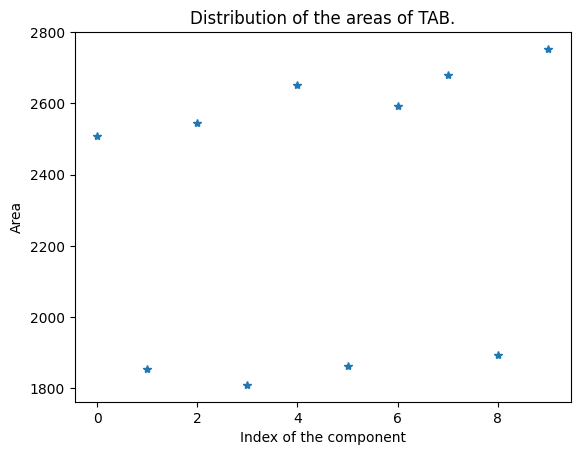

In [48]:
#Plot
plt.plot(TAB, linestyle='none', marker='*')
plt.title('Distribution of the areas of TAB.')
plt.xlabel('Index of the component')
plt.ylabel('Area')
plt.show()

##### 1.2.4. What about find(TAB >= 1500 & TAB <= 2000)?  

In [ ]:
#Finding the indeces of the objets in Class 1
class1_idx = np.where((TAB >= 1500) & (TAB <= 2000))[0]
print("Indeces of the objets in Class 1:", class1_idx)

Indeces of the objets in Class 1: [1 3 5 8]


##### 1.2.5. And size(find(TAB >= 1500 & TAB <= 2000),2)?

In [41]:
#Counting the objects in Class 1
class1_count = np.size(np.where((TAB >= 1500) & (TAB <= 2000))[0])
print("Number of objects in Class 1:", class1_count)

Number of objects in Class 1: 4


##### 1.2.6. Try to automatically compute the number of elements of each class.

In [ ]:
#Counting automatically the coins for each class
class1_count = np.sum((TAB >= 1500) & (TAB <= 2000))
class2_count = np.sum((TAB >= 2300) & (TAB <= 2800))

print(f"Number of coins in Class 1 (1500-2000 pixels): {class1_count}")
print(f"Number of coins in Class 2 (2300-2800 pixels): {class2_count}")

Number of coins in Class 1 (1500-2000 pixels): 4
Number of coins in Class 2 (2300-2800 pixels): 6


##### 1.2.7. Assuming that these objects are circular, we try to approximate their radius, using both Perimeter and Area signatures.
##### 1.2.7.1. How to compute these data using one regionprops command?

In [45]:
#Extracting the areas and the perimeters
areas = np.array([region.area for region in STATS])
perimeters = np.array([region.perimeter for region in STATS])
print("Areas:", areas)
print("Perimeters:", perimeters)

Areas: [2510. 1854. 2544. 1810. 2651. 1864. 2594. 2680. 1893. 2753.]
Perimeters: [184.50966799 158.36753237 186.16652224 156.36753237 189.92388155
 158.61017306 187.92388155 190.75230868 161.19595949 192.75230868]


##### 1.2.7.2. Try to approximate the radius of each coin using classical functions for a disk: Perimeter = f(R) and Area = g(R)?

##### Formulas for:
- Radius from the Area **A**: $R = \sqrt\frac{A}{\pi}$
- Radius from the Perimeter **P**: $R = \frac{P}{\pi}$

In [ ]:
#Calculating the radius using the formulas
rad_area = np.sqrt(areas / np.pi)
rad_perimeter = perimeters / (2 * np.pi)

#Results
print("Radius calculated from the Area", rad_area)
print("Radius calculated from the Perimeter:", rad_perimeter)

Radius calculated from the Area [28.26584183 24.29293167 28.45663983 24.00293511 29.04891578 24.35835848
 28.73492378 29.20737056 24.54711011 29.60248497]
Radius calculated from the Perimeter: [29.36562571 25.2049756  29.62932225 24.88666572 30.22732456 25.24359307
 29.90901467 30.35917283 25.65513376 30.67748272]
